In [1]:
# <editor-fold desc="import stuff">
import pandas as pd
import numpy as np
import io
# </editor-fold>

In [2]:
# <editor-fold desc="Make Dataframe">
path = "../Module4/DatafinitiElectronicsProductsPricingData.csv"
Review_df = pd.read_csv(path)
# </editor-fold>


In [3]:
Review_df.columns

Index(['id', 'prices.amountMax', 'prices.amountMin', 'prices.availability',
       'prices.condition', 'prices.dateSeen', 'prices.isSale',
       'prices.merchant', 'prices.shipping', 'asins', 'brand', 'categories',
       'dateAdded', 'dateUpdated', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'upc', 'weight'],
      dtype='object')

In [4]:
# <editor-fold desc="train, test validate part here">
# <editor-fold desc="train_test_split model">
from sklearn.model_selection import train_test_split
#let train, validate and test one dataframe into .70, .20, .10
train_ratio = .70
validation_ratio = .20
test_ratio = .10

train, test = train_test_split(Review_df, test_size = 1 - train_ratio)
validate, test = train_test_split(test, test_size=test_ratio/(test_ratio+validation_ratio))
# </editor-fold>
# </editor-fold>

In [5]:
train.dtypes

id                      object
prices.amountMax       float64
prices.amountMin       float64
prices.availability     object
prices.condition        object
prices.dateSeen         object
prices.isSale             bool
prices.merchant         object
prices.shipping         object
asins                   object
brand                   object
categories              object
dateAdded               object
dateUpdated             object
ean                     object
keys                    object
manufacturer            object
manufacturerNumber      object
upc                     object
weight                 float64
dtype: object

#let encode a single string column.

In [6]:
# <editor-fold desc="looks at some columns">
id = train['id'].value_counts()
prices_availability = train['prices.availability'].value_counts()
prices_condition =train['prices.condition'].value_counts()
prices_merchant =train['prices.merchant'].value_counts()
prices_shipping =train['prices.shipping'].value_counts()
categories= train['categories'].value_counts()
manufacturer =train['manufacturer'].value_counts()
manufacturerNumber =train['manufacturerNumber'].value_counts()
# </editor-fold>


In [7]:
# <editor-fold desc="look at id">
#print(prices_availability, prices_condition, prices_merchant, prices_shipping, categories, manufacturer, manufacturerNumber)
# </editor-fold>


OneHotEncode = prices.availability, prices.condition, 


Rewrite columns for manufacturer, 
prices.shipping, if has free shipping = 1, if no free shipping 0.
prices.merchant = 
manufacturer,

drop categories,

In [8]:
# <editor-fold desc="Cardinality and target">
target = 'prices.amountMax'

train_features = train.drop(columns=[target,'id', 'prices.amountMin'])
#In the dataframe, grab all the numeric columns, then list it into columns. Finally turn it into array.
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
#This (not a number) columns has how many unique categories?
cardinality = train_features.select_dtypes(exclude='number').nunique()
#if this columns has less than 50 keep that column, and turn it into array. (important step for panda ARRAY)
categorical_features = cardinality[cardinality <= 50].index.tolist()
#combine the list
features = numeric_features + categorical_features
# </editor-fold>

In [9]:
featuresForShapley  = features

In [10]:
# <editor-fold desc="X train, validate, and test">
X_train = train[features]
y_train = train[target]

X_validate = validate[features]
y_validate = validate[target]

X_test = test[features]
# </editor-fold>

instantiate it and ensure that we get a dense (and not sparse) array returned, and then encode our single column with the fit_transform method.

In [11]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

pipeline = make_pipeline(
    preprocessing.LabelEncoder(),
    #ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs=-1)
)

In [12]:
# <editor-fold desc="This is to fix continous Error">
#from sklearn import preprocessing
#from sklearn import utils

#lab_enc = preprocessing.LabelEncoder()
#training_scores_encoded = lab_enc.fit_transform(y_train)
#print(training_scores_encoded)
#print(utils.multiclass.type_of_target(y_train))
#print(utils.multiclass.type_of_target(y_train.astype('int')))
#print(utils.multiclass.type_of_target(training_scores_encoded))

# </editor-fold>


import xgboost

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore') #handle_unknow by putting all zeors.
for one unique in a column, nan, none, 

can fill value with a paramenter
si = SimpleImputer(strategy='constant', fill_value = 'MISSING')

The OneHotEncoder works analogously. During the fit method, it finds all the unique values for each column and again stores this. When transform is called, it uses these stored unique values to produce the binary array.

In [13]:
from xgboost import XGBRegressor

pipeline_OHE_XGRegressor = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    XGBRegressor()
)

In [14]:
pipeline_OHE_XGRegressor.fit(X_train,y_train)

C:\ProgramData\Miniconda3\envs\WhySoSeriousPython3.8\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Miniconda3\envs\WhySoSeriousPython3.8\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[12:59:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['prices.availability', 'prices.condition',
                                     'prices.shipping'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=None, n_estimators=100, n_jobs=1,
                              nthread=None, objective='reg:linear',
                              random_state=0, reg_alpha=0, reg_lambda=1,
 

In [15]:
from sklearn.metrics import r2_score
#from xgboost import r2_score
y_pred_OHE_XGregressor = pipeline_OHE_XGRegressor.predict(X_validate)
print('validation Accuracy', r2_score(y_validate,y_pred_OHE_XGregressor))

validation Accuracy 0.6891936109505792


In [16]:
encoder = ce.OneHotEncoder()
X_train_encoder = encoder.fit_transform(X_train)
X_val_encoder = encoder.transform(X_validate)

In [17]:
eval_set = [(X_train_encoder, y_train),
        (X_val_encoder, y_validate)]

model = XGBRegressor()

model.fit(X_train_encoder, y_train, eval_set=eval_set)

[12:59:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:871.355	validation_1-rmse:943.099
[1]	validation_0-rmse:821.025	validation_1-rmse:887.772
[2]	validation_0-rmse:777.746	validation_1-rmse:839.901
[3]	validation_0-rmse:740.451	validation_1-rmse:798.718
[4]	validation_0-rmse:708.622	validation_1-rmse:762.784
[5]	validation_0-rmse:681.621	validation_1-rmse:732.377
[6]	validation_0-rmse:655.791	validation_1-rmse:704.324
[7]	validation_0-rmse:636.017	validation_1-rmse:681.468
[8]	validation_0-rmse:618.679	validation_1-rmse:662.227
[9]	validation_0-rmse:604.007	validation_1-rmse:644.945
[10]	validation_0-rmse:589.674	validation_1-rmse:630.676
[11]	validation_0-rmse:577.753	validation_1-rmse:618.684
[12]	validation_0-rmse:566.214	validation_1-rmse:604.794
[13]	validation_0-rmse:557.394	validation_1-rmse:596.362
[14]	validation_0-rmse:548.366	validation_1-rmse:586.799
[15]	validation_0-rmse:542.801	validati

C:\ProgramData\Miniconda3\envs\WhySoSeriousPython3.8\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Miniconda3\envs\WhySoSeriousPython3.8\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[43]	validation_0-rmse:479.97	validation_1-rmse:526.946
[44]	validation_0-rmse:478.355	validation_1-rmse:525.882
[45]	validation_0-rmse:477.992	validation_1-rmse:525.64
[46]	validation_0-rmse:477.601	validation_1-rmse:525.106
[47]	validation_0-rmse:477.311	validation_1-rmse:524.928
[48]	validation_0-rmse:476.76	validation_1-rmse:524.155
[49]	validation_0-rmse:474.164	validation_1-rmse:520.95
[50]	validation_0-rmse:472.032	validation_1-rmse:517.899
[51]	validation_0-rmse:470.038	validation_1-rmse:514.911
[52]	validation_0-rmse:469.794	validation_1-rmse:514.75
[53]	validation_0-rmse:468.026	validation_1-rmse:512.168
[54]	validation_0-rmse:466.948	validation_1-rmse:509.938
[55]	validation_0-rmse:466.185	validation_1-rmse:509.069
[56]	validation_0-rmse:462.796	validation_1-rmse:507.382
[57]	validation_0-rmse:462.592	validation_1-rmse:507.256
[58]	validation_0-rmse:461.316	validation_1-rmse:506.247
[59]	validation_0-rmse:458.684	validation_1-rmse:504.134
[60]	validation_0-rmse:458.36	valida

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [18]:
example = X_validate.iloc[[0]]
example2 = X_validate.iloc[[2]]

In [19]:
example.dtypes

weight                 float64
prices.availability     object
prices.condition        object
prices.isSale             bool
prices.shipping         object
dtype: object

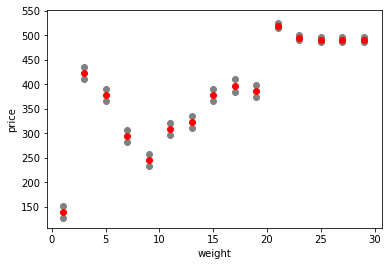

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

examples = pd.concat([example, example2])
for price in range(1, 30, 2):
    examples['weight'] = price
    preds = pipeline_OHE_XGRegressor.predict(examples)
    for pred in preds:
        plt.scatter(price,pred,color='grey')
    plt.scatter(price, np.mean(preds), color='red')
    plt.xlabel('weight')
    plt.ylabel('price')

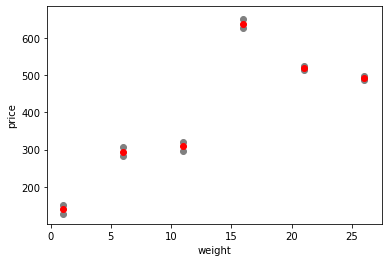

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

examples = pd.concat([example,example2])
for weight in range(1,30,5):
    examples['weight'] = weight
    preds_price = pipeline_OHE_XGRegressor.predict(examples)
    for pred in preds_price:
        plt.scatter(weight,pred,color='grey')
    plt.scatter(weight,np.mean(preds_price), color='red')
    plt.xlabel('weight')
    plt.ylabel('price')

In [22]:
import matplotlib.pyplot as plot
plt.rcParams['figure.dpi'] = 72

(0, 55)

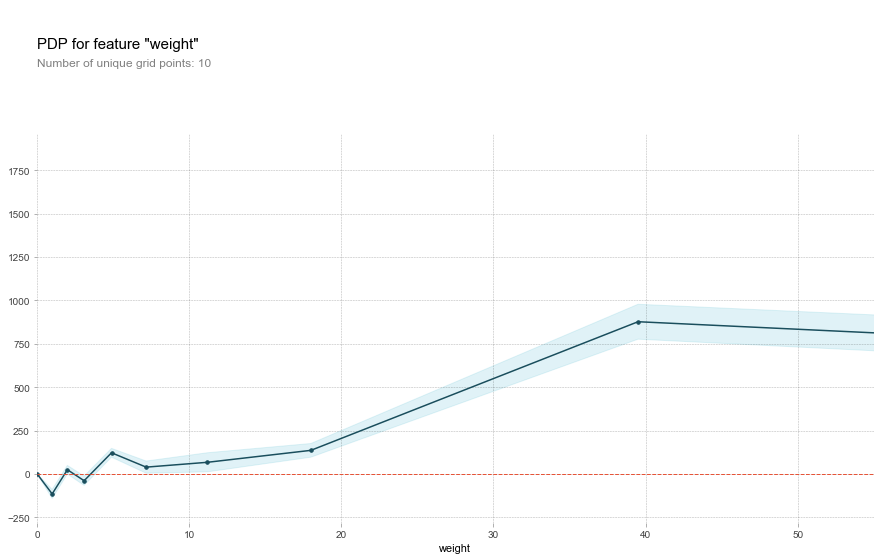

In [23]:
from pdpbox.pdp import pdp_isolate, pdp_plot
##gb is pipeline_make of ordinalEncoder, XGBREGRESSOR
#X_val is dataset
#model feature is the features of X_val columns
#
feature = 'weight'
isolated = pdp_isolate(
    model=pipeline_OHE_XGRegressor,
    dataset=X_validate,
    model_features=X_validate.columns,
    feature=feature
)
pdp_plot(isolated, feature_name=feature);
plt.xlim(0,55)

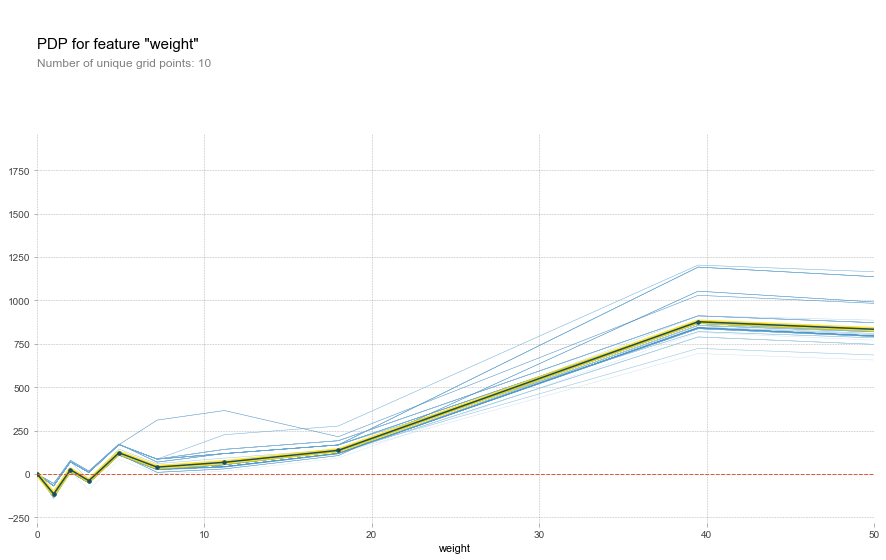

In [24]:
pdp_plot(isolated,feature_name = feature, plot_lines=True, frac_to_plot=100)
plt.xlim(0,50);

In [25]:
isolated_Two = pdp_isolate(
    model=pipeline_OHE_XGRegressor,
    dataset=X_validate,
    model_features=X_validate.columns,
    feature=feature,
    num_grid_points=50
)

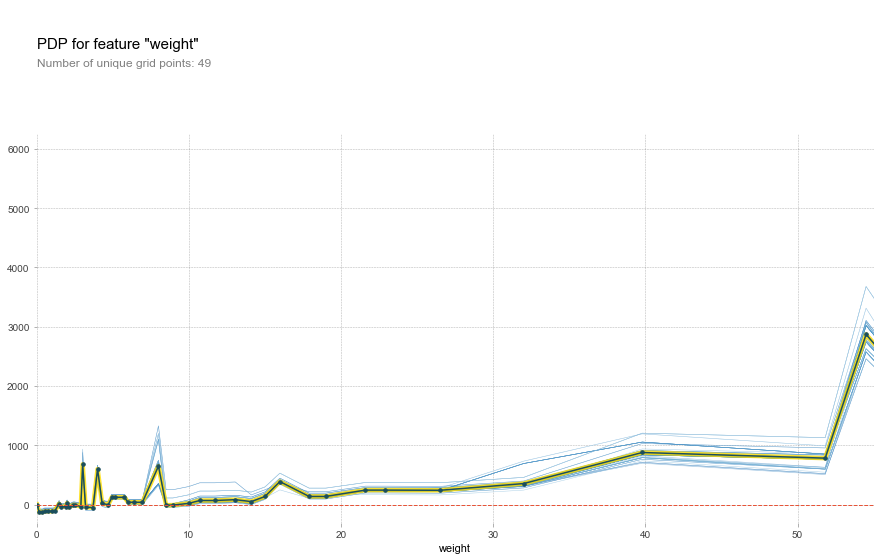

In [26]:
pdp_plot(isolated_Two,feature_name = feature, plot_lines=True, frac_to_plot=100)
plt.xlim(0,55);

Text(0.5, 1.0, 'Partial dependence')

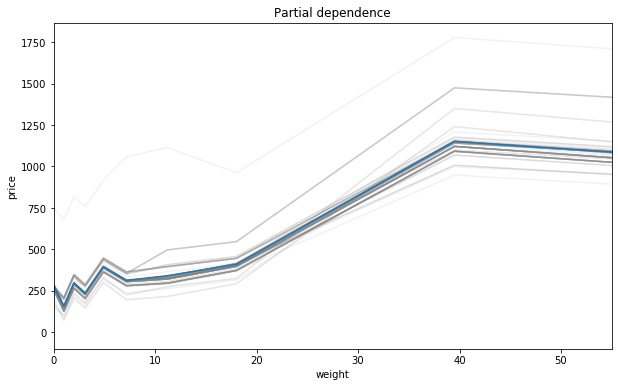

In [27]:
grid = isolated.feature_grids
pdp = isolated.pdp

ice = isolated.ice_lines.sample(n=100).T

ice.plot(color='grey', alpha=.1, legend=False, figsize=(10,6))
plt.plot(grid,pdp)
plt.xlim(0,55)
plt.xlabel('weight')
plt.ylabel('price')
plt.title('Partial dependence')

In [30]:
import xgboost
import shap
#featuresForShapley
def BlackBox(weight, availability_1, availability_2, 
 availability_3, condition_1, condition_2, 
 condition_3, condition_4, condition_5, 
 condition_6, condition_7, condition_8, 
 isSale, shipping_1, shipping_2, shipping_3, 
 shipping_4, shipping_5, shipping_6, shipping_7, 
 shipping_8, shipping_9):
    dfShap = pd.DataFrame(
        data = [[weight, availability_1, availability_2, 
 availability_3, condition_1, condition_2, 
 condition_3, condition_4, condition_5, 
 condition_6, condition_7, condition_8, 
 isSale, shipping_1, shipping_2, shipping_3, 
 shipping_4, shipping_5, shipping_6, shipping_7, 
 shipping_8, shipping_9]],
        columns = ['weight', 'prices.availability_1', 'prices.availability_2', 
 'prices.availability_3', 'prices.condition_1', 'prices.condition_2', 
 'prices.condition_3', 'prices.condition_4', 'prices.condition_5', 
 'prices.condition_6', 'prices.condition_7', 'prices.condition_8', 
 'prices.isSale', 'prices.shipping_1', 'prices.shipping_2', 'prices.shipping_3', 
 'prices.shipping_4', 'prices.shipping_5', 'prices.shipping_6', 'prices.shipping_7', 
 'prices.shipping_8', 'prices.shipping_9']
    )
    
    pred = model.predict(dfShap)[0]
    
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(dfShap)
    
    feature_names = dfShap.columns
    feature_values = dfShap.values[0]
    
    result = f'Rent is estimated at %{pred:,.0f} for this NYC apartment \n'
    result += f'Starting from a baseline of ${explainer.expected_value:,.0f} \n'
    print(result)
    
    shap.initjs()
    return shap.force_plot(
        base_value = explainer.expected_value,
        shap_values=shap_values,
        features=dfShap
    )
 

In [31]:
BlackBox(20,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1)

Rent is estimated at %1,561 for this NYC apartment 
Starting from a baseline of $509 



['weight', 'prices.availability_1', 'prices.availability_2', 
 'prices.availability_3', 'prices.condition_1', 'prices.condition_2', 
 'prices.condition_3', 'prices.condition_4', 'prices.condition_5', 
 'prices.condition_6', 'prices.condition_7', 'prices.condition_8', 
 'prices.isSale', 'prices.shipping_1', 'prices.shipping_2', 'prices.shipping_3', 
 'prices.shipping_4', 'prices.shipping_5', 'prices.shipping_6', 'prices.shipping_7', 
 'prices.shipping_8', 'prices.shipping_9'] 

